# A Computer Vision Example

## 1. Import

In [70]:
import tensorflow as tf
print(tf.__version__)
import time

2.18.0


The labels associated with the dataset are:

0 = T-shirt/top                                                                                              
1 = Trouser                                                                                          
2 = Pullover                                                                                                                             
3 = Dress                                                            
4 = Coat                            
5 = Sandal                                   
6 = Shirt                                                                      
7 = Sneaker                                  
8 = Bag                                                       
9 = Ankle boot                                       

## 2. Dataset

In [71]:
mnist = tf.keras.datasets.fashion_mnist

What do those values look like? Print a training image and a training label to see. You can experiment with different indices in the array.

In [72]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

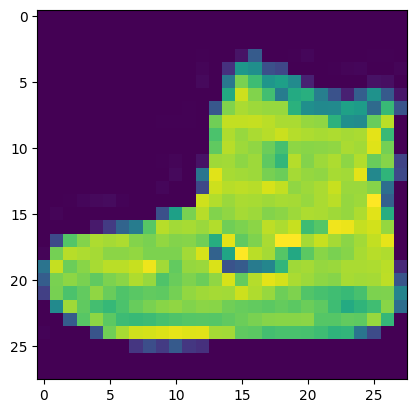

In [73]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

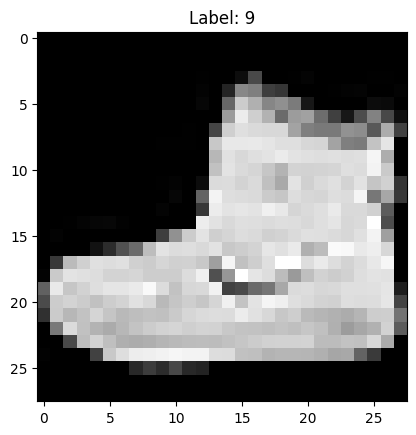

In [74]:
# Display a sample image and label
plt.imshow(training_images[0], cmap='gray')
plt.title(f"Label: {training_labels[0]}")
plt.show()

You'll notice that all the values are integers between 0 and 255. When training a neural network, it's easier to treat all values as between 0 and 1, a process called normalization. Fortunately, Python provides an easy way to normalize a list like that without looping.

In [75]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

## 3. Understanding the Model Design
- Flatten Layer: Converts multi-dimensional input (e.g., images) into a 1D vector for processing.
- Dense Layer (128, ReLU): Fully connected layer with 128 neurons using ReLU activation to introduce non-linearity.
- Dense Layer (10, Softmax): Outputs class probabilities for 10 categories using the softmax function for multi-class classification.

In [76]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

## 4. Compile and Train the Model
After defining the model, you need to compile it using an optimizer, a loss function, and evaluation metrics. This prepares the model for training.

- Compiling the Model                        
Optimizer (Adam): Adjusts the model weights to minimize the loss function.                               
Loss (sparse_categorical_crossentropy): Suitable for multi-class classification with integer labels.                               
Metrics (accuracy): Measures the proportion of correct predictions.                              
                     
- Training the Model                        
model.fit(training_images, training_labels, epochs=5)                            
training_images: Input data for the model.                               
training_labels: Correct labels corresponding to the training data.                                  
epochs=5: Number of times the model sees the entire dataset during training.                         

In [77]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(training_images, training_labels, epochs=5)
training_time = time.time() - start_time

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7793 - loss: 0.6308
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8595 - loss: 0.3809
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8757 - loss: 0.3396
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8830 - loss: 0.3193
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8906 - loss: 0.2921


## 5. Test the Model

test_images: Input data the model hasn't seen during training.
test_labels: Correct labels corresponding to the test data.

In [78]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8671 - loss: 0.3766


In [79]:
print(test_loss, test_acc)

0.3762980103492737 0.866599977016449


## 6. Exploration exercises

- Exercise 1

In [80]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[1.1359828e-06 3.0130469e-09 3.4753477e-08 4.6517620e-08 4.4007997e-08
 5.4977280e-03 1.5456554e-06 4.5273349e-02 2.6738699e-06 9.4922352e-01]


In [81]:
print(test_labels[0])

9


- Exercise 2

128 neurons

In [82]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(training_images, training_labels, epochs=5)
training_time = time.time() - start_time

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"\nNeurons: {128}")
print(f"Training Time: {training_time:.1f}s")
print(f"Test Accuracy: {test_acc:.3f}")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7791 - loss: 0.6210
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.8628 - loss: 0.3814
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8764 - loss: 0.3381
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8848 - loss: 0.3124
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8932 - loss: 0.2880
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8662 - loss: 0.3681

Neurons: 128
Training Time: 93.2s
Test Accuracy: 0.865


512 neurons

In [83]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(training_images, training_labels, epochs=5)
training_time = time.time() - start_time

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"\nNeurons: {512}")
print(f"Training Time: {training_time:.1f}s")
print(f"Test Accuracy: {test_acc:.3f}")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.7952 - loss: 0.5852
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8663 - loss: 0.3659
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8827 - loss: 0.3214
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8866 - loss: 0.3021
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8960 - loss: 0.2793
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8778 - loss: 0.3512

Neurons: 512
Training Time: 130.4s
Test Accuracy: 0.879


- 1024 neurons

In [84]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

start_time = time.time()
model.fit(training_images, training_labels, epochs=5)
training_time = time.time() - start_time

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"\nNeurons: {1024}")
print(f"Training Time: {training_time:.1f}s")
print(f"Test Accuracy: {test_acc:.3f}")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.7918 - loss: 0.5815
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8649 - loss: 0.3654
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8825 - loss: 0.3202
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8907 - loss: 0.2948
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8969 - loss: 0.2765
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8619 - loss: 0.3947

Neurons: 1024
Training Time: 119.6s
Test Accuracy: 0.862


- Exercise 3

In [86]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.18.0
Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 28, 10)

- Exercise-4

In [87]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.18.0
Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 618, in run_forever

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\asyncio\base_events.py", line 1951, in _run_once

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\Pailla Bhanu Tej\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\Pailla Bhanu Tej\AppData\Local\Temp\ipykernel_26484\1013696507.py", line 24, in <module>

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 371, in fit

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 219, in function

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 132, in multi_step_on_iterator

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 113, in one_step_on_data

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 60, in train_step

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 691, in __call__

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\compile_utils.py", line 700, in call

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\loss.py", line 67, in __call__

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py", line 33, in call

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py", line 2246, in sparse_categorical_crossentropy

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py", line 1963, in sparse_categorical_crossentropy

  File "c:\Users\Pailla Bhanu Tej\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 7 2 1 3 4 0 2 5 6 0 9 5 6 0 7 0 7 9 9 4 4 3 4 7 9 8 6 0 1 8 6 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_808537]

- Exercise-5